<a href="https://colab.research.google.com/github/everestso/Fall2021/blob/main/Test10192021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cvxopt as cvxopt
import pylab as pl

In [41]:
#data = [((-7, 10), -1), ((-3, 4), -1), ((8, 7), 1), ((1, 16), -1), ((8, -4), 1), ((9, 5), 1), ((-4, 14), -1), ((-1, -8), 1), ((-8, 0), -1), ((8, 3), 1)] ## data2## data2

data = [((-8.0, 0.0), -1.0), ((-7.0, 10.0), -1.0), ((-4.0, 14.0), -1.0), ((-3.0, 4.0), -1.0), ((1.0, 16.0), -1.0), ((-1.0, -8.0), 1.0), ((8.0, -4.0), 1.0), ((8.0, 3.0), 1.0), ((8.0, 7.0), 1.0), ((9.0, 5.0), 1.0)] ## data2## data2

-1.0 [-8.  0.]
-1.0 [-7. 10.]
-1.0 [-4. 14.]
-1.0 [-3.  4.]
-1.0 [ 1. 16.]
1.0 [-1. -8.]
1.0 [ 8. -4.]
1.0 [8. 3.]
1.0 [8. 7.]
1.0 [9. 5.]


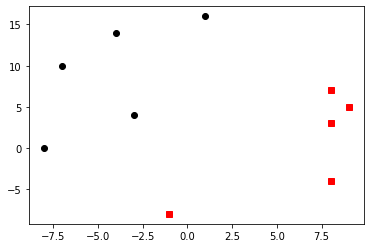

In [42]:
m =len(X)  
d = len(data[0][0])
targets = np.reshape([t for _,t in data], (m,1))
X = np.reshape([x for x,_ in data], (m,d))
for i in range(m): print (targets[i,0], X[i])

l1 =  np.where(targets==1)[0]
l2 =  np.where(targets==-1)[0]
pl.plot(X[l1,0],X[l1,1],'rs')
pl.plot(X[l2,0],X[l2,1],'ko')
pl.show()

In [43]:
K = np.dot(X,X.T)
P=targets*targets.transpose()*K
q = -np.ones((m,1))
G = -np.eye(m)
h = np.zeros((m,1))

A = targets.reshape(1,m)
b = 0.0

print (P, P.shape)
print ("K", K, K.shape)
print ("X", X.shape)
print ("A", A, A.shape)

[[  64.   56.   32.   24.   -8.   -8.   64.   64.   64.   72.]
 [  56.  149.  168.   61.  153.   73.   96.   26.  -14.   13.]
 [  32.  168.  212.   68.  220.  108.   88.  -10.  -66.  -34.]
 [  24.   61.   68.   25.   61.   29.   40.   12.   -4.    7.]
 [  -8.  153.  220.   61.  257.  129.   56.  -56. -120.  -89.]
 [  -8.   73.  108.   29.  129.   65.   24.  -32.  -64.  -49.]
 [  64.   96.   88.   40.   56.   24.   80.   52.   36.   52.]
 [  64.   26.  -10.   12.  -56.  -32.   52.   73.   85.   87.]
 [  64.  -14.  -66.   -4. -120.  -64.   36.   85.  113.  107.]
 [  72.   13.  -34.    7.  -89.  -49.   52.   87.  107.  106.]] (10, 10)
K [[  64.   56.   32.   24.   -8.    8.  -64.  -64.  -64.  -72.]
 [  56.  149.  168.   61.  153.  -73.  -96.  -26.   14.  -13.]
 [  32.  168.  212.   68.  220. -108.  -88.   10.   66.   34.]
 [  24.   61.   68.   25.   61.  -29.  -40.  -12.    4.   -7.]
 [  -8.  153.  220.   61.  257. -129.  -56.   56.  120.   89.]
 [   8.  -73. -108.  -29. -129.   65.   24.

In [44]:
sol = cvxopt.solvers.qp(cvxopt.matrix(P),cvxopt.matrix(q),cvxopt.matrix(G),cvxopt.matrix(h), cvxopt.matrix(A), cvxopt.matrix(b))
print(sol)

     pcost       dcost       gap    pres   dres
 0: -1.0198e+00 -1.6045e+00  2e+01  4e+00  2e+00
 1: -5.2594e-01 -2.1167e-01  3e+00  7e-01  2e-01
 2: -1.3279e-03 -8.1289e-02  8e-02  3e-16  4e-15
 3: -2.6697e-02 -3.3244e-02  7e-03  2e-18  3e-16
 4: -3.2054e-02 -3.2194e-02  1e-04  1e-17  5e-16
 5: -3.2135e-02 -3.2137e-02  1e-06  1e-17  3e-16
 6: -3.2136e-02 -3.2136e-02  1e-08  5e-18  2e-16
Optimal solution found.
{'x': <10x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <10x1 matrix, tc='d'>, 'z': <10x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 1.3979928338791115e-08, 'relative gap': 4.3502258706909544e-07, 'primal objective': -0.03213609765179999, 'dual objective': -0.03213611163172833, 'primal infeasibility': 4.906538933778981e-18, 'dual infeasibility': 2.0692715557160056e-16, 'primal slack': 9.375047784967286e-10, 'dual slack': 5.1711529896648424e-08, 'iterations': 6}


In [45]:
threshold=1e-3

# Get the Lagrange multipliers out of the solution dictionary
lambdas = np.array(sol['x'])

# Find the (indices of the) support vectors, which are the vectors with non-zero Lagrange multipliers
sv = np.where(lambdas>threshold)[0]
nsupport = len(sv)
print (nsupport, "support vectors found" )

# Just retain the data corresponding to the support vectors
SVMx = X[sv,:]
SVMlambdas = lambdas[sv]
SVMtargets = targets[sv]

    #self.b = np.sum(self.targets)
    #for n in range(self.nsupport):
    #self.b -= np.sum(self.lambdas*self.targets.T*np.reshape(self.K[self.sv[n],self.sv],(self.nsupport,1)))
    #self.b /= len(self.lambdas)
    #print "b=",self.b

b = np.sum(SVMtargets)
for n in range(nsupport):
  b -= np.sum(SVMlambdas*SVMtargets*np.reshape(K[sv[n],sv],(nsupport,1)))
b /= len(SVMlambdas)

3 support vectors found


In [46]:
print(SVMlambdas)
roundedLambdas = [round(l[0],3) for l in SVMlambdas]
print (roundedLambdas)
print (round(b,3))
print (SVMx)

[[0.0321361 ]
 [0.01512287]
 [0.01701323]]
[0.032, 0.015, 0.017]
0.174
[[-3.  4.]
 [-1. -8.]
 [ 8.  7.]]


In [47]:
#SVM for Prediction
x = (0.04967142, -0.01382643 )

K = lambda a, b: np.dot(np.transpose(a), b)
def Predict(SVx, SVl, SVt, b, x):
  tot = 0
  for i in range(len(SVx)):
    tot += SVt[i] * SVl[i] * K(SVx[i], x)
  #print (tot)
  #print (tot + b)
  #print (SVt[i])
  return tot+b

for x, r in zip(X, targets):
  print(x, Predict(SVMx,SVMlambdas, SVMtargets, b, x), r)

[-8.  0.] [-1.5652171] [-1.]
[-7. 10.] [-2.65217337] [-1.]
[-4. 14.] [-2.52173858] [-1.]
[-3.  4.] [-0.99999977] [-1.]
[ 1. 16.] [-1.69565173] [-1.]
[-1. -8.] [0.99999982] [1.]
[ 8. -4.] [2.43478224] [1.]
[8. 3.] [1.52173896] [1.]
[8. 7.] [0.99999995] [1.]
[9. 5.] [1.47826073] [1.]


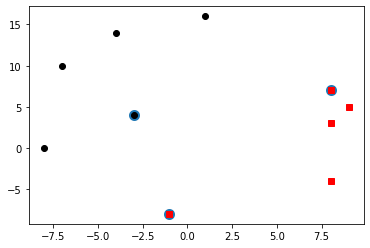

In [48]:
pl.figure()
l1 =  np.where(targets==1)[0]
l2 =  np.where(targets==-1)[0]
pl.plot(X[sv,0],X[sv,1],'o',markeredgewidth=5)
pl.plot(X[l1,0],X[l1,1],'rs')
pl.plot(X[l2,0],X[l2,1],'ko')
pl.show()

In [53]:
Wmodel = sum([a*r*x for x,a,r in zip(SVMx,SVMlambdas, SVMtargets)])
print (Wmodel, b)


[ 0.21739127 -0.13043475] 0.17391305979326885


In [59]:
Fx2 = lambda W, x: (b+W[0]*x)/(-1*W[1])


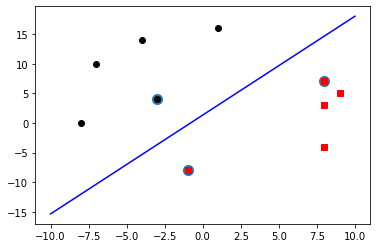

In [60]:
pl.figure()
l1 =  np.where(targets==1)[0]
l2 =  np.where(targets==-1)[0]
pl.plot(X[sv,0],X[sv,1],'o',markeredgewidth=5)
pl.plot(X[l1,0],X[l1,1],'rs')
pl.plot(X[l2,0],X[l2,1],'ko')
pl.plot([-10, 10], [Fx2(Wmodel, -10), Fx2(Wmodel, 10)], 'b-' )
pl.show()